# Intro to Prophet

Step 1: import prophet & set up model

In [1]:
from fbprophet import Prophet

m = Prophet()

Step 1.5: import and set up your data

In [2]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/gumdropsteve/datasets/master/views.csv')

df

,Date,Views
0,2019-05-03,5
1,2019-05-04,21
2,2019-05-05,10
3,2019-05-06,5
4,2019-05-07,2
...,...,...
537,2020-10-21,243
538,2020-10-22,185
539,2020-10-23,116
540,2020-10-24,139


In [3]:
# change column names to be what prophet expects
df.columns = ['ds', 'y']

df

,ds,y
0,2019-05-03,5
1,2019-05-04,21
2,2019-05-05,10
3,2019-05-06,5
4,2019-05-07,2
...,...,...
537,2020-10-21,243
538,2020-10-22,185
539,2020-10-23,116
540,2020-10-24,139


Step 2: fit the model

In [4]:
m.fit(df)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Step 3: make a dataframe to hold your future value predictions

In [5]:
future = m.make_future_dataframe(periods=365)

future.tail()

,ds
902,2021-10-21
903,2021-10-22
904,2021-10-23
905,2021-10-24
906,2021-10-25


In [6]:
# note: future dataframe includes OG dates
future

,ds
0,2019-05-03
1,2019-05-04
2,2019-05-05
3,2019-05-06
4,2019-05-07
...,...
902,2021-10-21
903,2021-10-22
904,2021-10-23
905,2021-10-24


In [7]:
type(future)

pandas.core.frame.DataFrame

In [8]:
future.shape

(907, 1)

Step 4: make a forecast (make some predictions)

In [9]:
m.predict(future)

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2019-05-03,12.334128,-56.343230,73.681027,12.334128,12.334128,-3.763182,-3.763182,-3.763182,-3.763182,-3.763182,-3.763182,0.0,0.0,0.0,8.570946
1,2019-05-04,12.849350,-54.428624,73.775811,12.849350,12.849350,-3.039072,-3.039072,-3.039072,-3.039072,-3.039072,-3.039072,0.0,0.0,0.0,9.810278
2,2019-05-05,13.364572,-55.316736,71.709261,13.364572,13.364572,-1.830340,-1.830340,-1.830340,-1.830340,-1.830340,-1.830340,0.0,0.0,0.0,11.534232
3,2019-05-06,13.879794,-54.065717,76.606369,13.879794,13.879794,-3.620190,-3.620190,-3.620190,-3.620190,-3.620190,-3.620190,0.0,0.0,0.0,10.259604
4,2019-05-07,14.395017,-41.965864,81.191707,14.395017,14.395017,5.969887,5.969887,5.969887,5.969887,5.969887,5.969887,0.0,0.0,0.0,20.364904
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902,2021-10-21,227.380800,163.564866,299.967552,202.334440,251.466422,1.836968,1.836968,1.836968,1.836968,1.836968,1.836968,0.0,0.0,0.0,229.217768
903,2021-10-22,227.483908,156.291306,293.141695,202.324921,251.621658,-3.763182,-3.763182,-3.763182,-3.763182,-3.763182,-3.763182,0.0,0.0,0.0,223.720726
904,2021-10-23,227.587016,152.211453,292.319886,202.359044,251.776894,-3.039072,-3.039072,-3.039072,-3.039072,-3.039072,-3.039072,0.0,0.0,0.0,224.547944
905,2021-10-24,227.690124,159.606889,293.015397,202.408426,251.932130,-1.830340,-1.830340,-1.830340,-1.830340,-1.830340,-1.830340,0.0,0.0,0.0,225.859784


In [10]:
forecast = m.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
902,2021-10-21,229.217768,160.107898,300.439908
903,2021-10-22,223.720726,157.535973,286.205089
904,2021-10-23,224.547944,153.338249,291.522362
905,2021-10-24,225.859784,157.408457,292.426899
906,2021-10-25,224.173042,156.099931,291.579574


Step 5: visualize the forecast

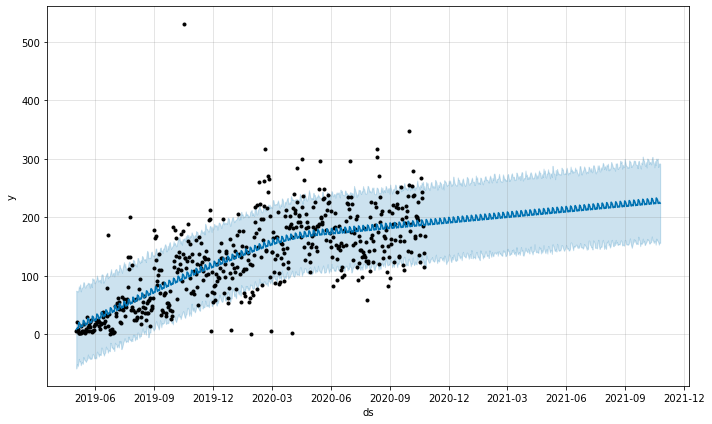

In [11]:
m.plot(forecast);

In [13]:
# sidetrack - what story was that outlier with 500+ views?
df.loc[df.y>500]  # doesn't look like anything was written that day.. odd..

,ds,y
167,2019-10-17,531


- Black dots: actual values
- Blue lines: upper, actual (dark blue), lower windows for yhat
- Blue blob: prediction window (yhat window)

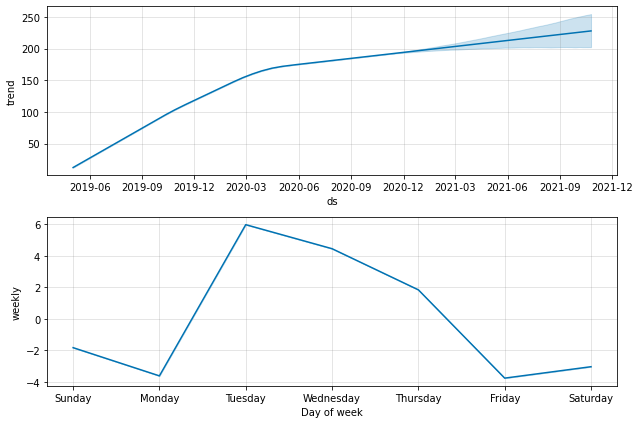

In [12]:
m.plot_components(forecast);

In [14]:
from fbprophet.plot import plot_plotly, plot_components_plotly

plot_plotly(m, forecast)

Step 6: model evaluation

https://facebook.github.io/prophet/docs/diagnostics.html

- initial: how much data to consider before making any predictions
    - e.g. 10 years = `'3650 days'`
- period: how frequently to make predictions 
    - e.g. every 6 months = `'180 days'`
    - should be about 1/2 of your `horizon`
- horizon: how many periods to predict
    - e.g. 1 year = `'365 days'`
    - should be about 2x your `period`

In [15]:
from fbprophet.diagnostics import cross_validation

cross_validation(m, initial='90 days', period='90 days', horizon='180 days')

INFO:fbprophet:Making 4 forecasts with cutoffs between 2019-08-02 00:00:00 and 2020-04-28 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2019-08-03,63.922390,29.469838,100.764580,60,2019-08-02
1,2019-08-04,67.845408,31.151272,102.801021,24,2019-08-02
2,2019-08-05,68.614533,33.169039,103.961216,30,2019-08-02
3,2019-08-06,72.537509,37.980193,110.078739,28,2019-08-02
4,2019-08-07,66.152638,30.769601,102.506774,41,2019-08-02
...,...,...,...,...,...,...
715,2020-10-21,271.282298,205.715514,336.091769,243,2020-04-28
716,2020-10-22,275.152552,209.218868,343.022705,185,2020-04-28
717,2020-10-23,266.195236,205.101621,329.519491,116,2020-04-28
718,2020-10-24,264.622471,200.428005,327.837472,139,2020-04-28


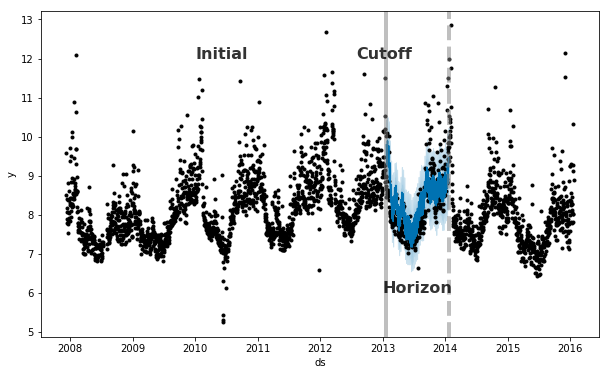

In [19]:
df_cv = cross_validation(m, initial='90 days', period='90 days', horizon='180 days')

df_cv['cutoff'].value_counts()

INFO:fbprophet:Making 4 forecasts with cutoffs between 2019-08-02 00:00:00 and 2020-04-28 00:00:00


2020-04-28    180
2020-01-29    180
2019-10-31    180
2019-08-02    180
Name: cutoff, dtype: int64

In [20]:
df_cv['cutoff'].unique()

array(['2019-08-02T00:00:00.000000000', '2019-10-31T00:00:00.000000000',
       '2020-01-29T00:00:00.000000000', '2020-04-28T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [17]:
df.ds.head(1)

0    2019-05-03
Name: ds, dtype: object

2019-05-03 + 90 days (our `initial`) is about 2019-08-03 (aka 2019-08-02)

2019-08-03 + 90 days days (our `period`) is about 2019-11-03 (aka 2019-10-31)

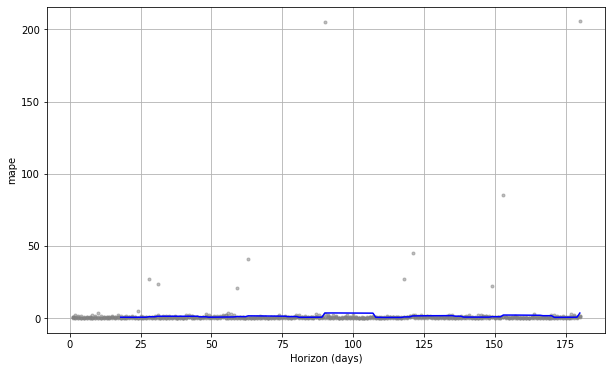

In [21]:
from fbprophet.plot import plot_cross_validation_metric

fig = plot_cross_validation_metric(df_cv, metric='mape')

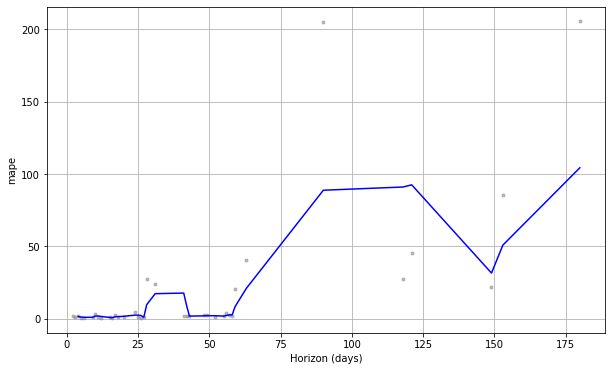

In [27]:
plot_cross_validation_metric(df_cv.loc[df_cv['y']<50], metric='mape');